In [ ]:
!git clone https://github.com/advadj67/hw3_M11221004.git

Cloning into 'hw3_M11221004'...
remote: Enumerating objects: 13628, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 13628 (delta 16), reused 21 (delta 6), pack-reused 13594
Receiving objects: 100% (13628/13628), 1.64 GiB | 36.78 MiB/s, done.
Resolving deltas: 100% (3421/3421), done.
Updating files: 100% (13680/13680), done.


In [ ]:
!git clone https://github.com/3a832069/ML03_dataset.git

Cloning into 'ML03_dataset'...
remote: Enumerating objects: 6804, done.
remote: Total 6804 (delta 0), reused 0 (delta 0), pack-reused 6804
Receiving objects: 100% (6804/6804), 1.55 GiB | 37.27 MiB/s, done.
Resolving deltas: 100% (3402/3402), done.
Updating files: 100% (6843/6843), done.


In [ ]:
!git clone https://github.com/3a832069/YOLO_pr.git

Cloning into 'YOLO_pr'...
remote: Enumerating objects: 10212, done.
remote: Total 10212 (delta 0), reused 0 (delta 0), pack-reused 10212
Receiving objects: 100% (10212/10212), 1.48 GiB | 39.93 MiB/s, done.
Resolving deltas: 100% (3406/3406), done.
Updating files: 100% (13666/13666), done.


In [ ]:
#資料夾準備
import os
# 定義基礎路徑
base_path = '/content/ML03_dataset/貨櫃資料集'
subfolders = ['train', 'test', 'val']

# 創建images和labels資料夾
images_path = os.path.join(base_path, 'images')
labels_path = os.path.join(base_path, 'labels')

os.makedirs(images_path, exist_ok=True)
os.makedirs(labels_path, exist_ok=True)

# 在images和labels資料夾下創建train, test, val子資料夾
for subfolder in subfolders:
    os.makedirs(os.path.join(images_path, subfolder), exist_ok=True)
    os.makedirs(os.path.join(labels_path, subfolder), exist_ok=True)





In [ ]:
!pip install Pillow


In [ ]:
from PIL import Image
import os

# 定義路徑
base_path = '/content/ML03_dataset/貨櫃資料集'
input_folders = {
    'train': '訓練集',
    'test': '測試集',
    'val': '驗證集'
}
output_base_path = os.path.join(base_path, 'images')

# 定義函數來調整圖片大小並保存
def resize_and_save(input_folder, output_folder, size=(416, 416)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for img_name in os.listdir(input_folder):
        img_path = os.path.join(input_folder, img_name)
        if os.path.isfile(img_path):
            with Image.open(img_path) as img:
                img = img.resize(size, Image.ANTIALIAS)
                img.save(os.path.join(output_folder, img_name))

# 對每種類型的資料進行處理
for image_type, folder_name in input_folders.items():
    input_folder = os.path.join(base_path, folder_name)
    output_folder = os.path.join(output_base_path, image_type)
    resize_and_save(input_folder, output_folder)

print("所有圖片已成功調整大小並另存。")


<ipython-input-3-a2a289944364>:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


所有圖片已成功調整大小並另存。


In [ ]:
from PIL import Image
import os

# 定義路徑
original_train_path = '/content/ML03_dataset/貨櫃資料集/測試集'
resized_train_path = '/content/ML03_dataset/貨櫃資料集/images/test'

# 定義函數來打印圖片的shape
def print_image_shapes(folder_path, num_images=2):
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    for img_name in image_files[:num_images]:
        img_path = os.path.join(folder_path, img_name)
        with Image.open(img_path) as img:
            print(f"Image: {img_name}, Shape: {img.size}")

# 打印原始圖片的shape
print("Original Images:")
print_image_shapes(original_train_path)

# 打印調整大小後的圖片的shape
print("Resized Images:")
print_image_shapes(resized_train_path)


Original Images:
Image: image_0540.jpg, Shape: (1920, 1080)
Image: image_0563.jpg, Shape: (1920, 1080)
Resized Images:
Image: image_0540.jpg, Shape: (416, 416)
Image: image_0563.jpg, Shape: (416, 416)


In [ ]:
#標籤處理
import os
import xml.etree.ElementTree as ET

classes = ['container']

# 標籤處理(符合YOLO格式)
def convert(size, box):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (box[0] + box[1]) / 2.0 - 1
    y = (box[2] + box[3]) / 2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def convert_xml_to_yolo(xmlPath, output_folder):
    tree = ET.parse(xmlPath)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    # 建立YOLO文件
    txt_filename = os.path.splitext(os.path.basename(xmlPath))[0] + '.txt'
    with open(os.path.join(output_folder, txt_filename), "w") as bbox:

        for obj in root.iter('object'):
            difficult = obj.find('difficult').text
            cls = obj.find('name').text
            if cls not in classes or int(difficult) == 1:
                continue
            cls_id = classes.index(cls)
            xmlbox = obj.find('bndbox')
            b = (float(xmlbox.find('xmin').text),
                 float(xmlbox.find('xmax').text),
                 float(xmlbox.find('ymin').text),
                 float(xmlbox.find('ymax').text))

            # 轉換成 YOLO 格式
            converted_bb = convert((w, h), b)
            bbox.write(f"{cls_id} {' '.join(str(coord) for coord in converted_bb)}\n")

# 處理整個資料夾
def process_xml_folder(xml_folder, output_folder):
    xml_files = [f for f in os.listdir(xml_folder) if f.endswith('.xml')]
    for xml_file in xml_files:
        xml_path = os.path.join(xml_folder, xml_file)
        convert_xml_to_yolo(xml_path, output_folder)

# 資料夾路徑設置
base_path = '/content/ML03_dataset/貨櫃資料集'
train_xml_folder = os.path.join(base_path, '訓練集_xml')
output_train_folder = os.path.join(base_path, 'labels/train')

val_xml_folder = os.path.join(base_path, '驗證集_xml')
output_val_folder = os.path.join(base_path, 'labels/val')

test_xml_folder = os.path.join(base_path, '測試集_xml')
output_test_folder = os.path.join(base_path, 'labels/test')

# 確認已建立
os.makedirs(output_train_folder, exist_ok=True)
os.makedirs(output_val_folder, exist_ok=True)
os.makedirs(output_test_folder, exist_ok=True)

# 進行格式轉換
process_xml_folder(train_xml_folder, output_train_folder)
process_xml_folder(val_xml_folder, output_val_folder)
process_xml_folder(test_xml_folder, output_test_folder)

print('標籤準備完成')


標籤準備完成


In [ ]:
#建立 v5data.yaml
# 定義v5data.yaml文件內容
yaml_content = """# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/ML03_dataset/貨櫃資料集  # dataset root dir
train: images/train  # train images (relative to 'path')
val: images/val  # val images (relative to 'path')
test: images/test  # test images (optional)

names:
  0: "container number"
"""

#定義路徑
yaml_file_path = '/content/ML03_dataset/貨櫃資料集/v5data.yaml'

# 寫入文件
with open(yaml_file_path, 'w') as file:
    file.write(yaml_content)



In [ ]:
#建立 yolov5.yaml
# 定義yolov5.yaml文件內容
yaml_content = """# Ultralytics YOLO 🚀, AGPL-3.0 license
# YOLOv5 object detection model with P3-P5 outputs. For details see https://docs.ultralytics.com/models/yolov5

# Parameters
nc: 1 # number of classes
names: "container number"

scales: # model compound scaling constants, i.e. 'model=yolov5n.yaml' will call yolov5.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.33, 0.25, 1024]
  s: [0.33, 0.50, 1024]
  m: [0.67, 0.75, 1024]
  l: [1.00, 1.00, 1024]
  x: [1.33, 1.25, 1024]

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  - [-1, 1, Conv, [64, 6, 2, 2]] # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]] # 1-P2/4
  - [-1, 3, C3, [128]]
  - [-1, 1, Conv, [256, 3, 2]] # 3-P3/8
  - [-1, 6, C3, [256]]
  - [-1, 1, Conv, [512, 3, 2]] # 5-P4/16
  - [-1, 9, C3, [512]]
  - [-1, 1, Conv, [1024, 3, 2]] # 7-P5/32
  - [-1, 3, C3, [1024]]
  - [-1, 1, SPPF, [1024, 5]] # 9

# YOLOv5 v6.0 head
head:
  - [-1, 1, Conv, [512, 1, 1]]
  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 6], 1, Concat, [1]] # cat backbone P4
  - [-1, 3, C3, [512, False]] # 13

  - [-1, 1, Conv, [256, 1, 1]]
  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 4], 1, Concat, [1]] # cat backbone P3
  - [-1, 3, C3, [256, False]] # 17 (P3/8-small)

  - [-1, 1, Conv, [256, 3, 2]]
  - [[-1, 14], 1, Concat, [1]] # cat head P4
  - [-1, 3, C3, [512, False]] # 20 (P4/16-medium)

  - [-1, 1, Conv, [512, 3, 2]]
  - [[-1, 10], 1, Concat, [1]] # cat head P5
  - [-1, 3, C3, [1024, False]] # 23 (P5/32-large)

  - [[17, 20, 23], 1, Detect, [nc]] # Detect(P3, P4, P5)
"""

#定義路徑
yaml_file_path = '/content/yolov5.yaml'

# 寫入文件
with open(yaml_file_path, 'w') as file:
    file.write(yaml_content)

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 7.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov5n.yaml')  # build a new model from YAML
model = YOLO('yolov5n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov5n.yaml').load('yolov5n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/ML03_dataset/貨櫃資料集/v5data.yaml', epochs=20, patience=5, imgsz=416)

# Save the best model
best_model_path = "/content/best_v5model.pt"
model.save(best_model_path)

model.val()  # It'll automatically evaluate the data you trained.

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.27M/5.27M [00:00<00:00, 68.5MB/s]


PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Transferred 427/427 items from pretrained weights
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.yaml, data=/content/ML03_dataset/貨櫃資料集/v5data.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 81.4MB/s]


AMP: checks passed ✅


train: Scanning /content/ML03_dataset/貨櫃資料集/labels/train... 2125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2125/2125 [00:03<00:00, 565.44it/s] 

train: New cache created: /content/ML03_dataset/貨櫃資料集/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/ML03_dataset/貨櫃資料集/labels/val... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:01<00:00, 458.53it/s]

val: New cache created: /content/ML03_dataset/貨櫃資料集/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.16G      1.378      2.064      1.114         15        416: 100%|██████████| 133/133 [00:35<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.58it/s]

                   all        536        536      0.945      0.932      0.985      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.969G     0.8417     0.8055     0.8899         22        416: 100%|██████████| 133/133 [00:35<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.09it/s]


                   all        536        536      0.987      0.996      0.995      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.969G     0.8232     0.6531     0.8936         10        416: 100%|██████████| 133/133 [00:32<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.36it/s]

                   all        536        536      0.991      0.987      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.965G     0.7741     0.5519     0.8792         17        416: 100%|██████████| 133/133 [00:32<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.57it/s]

                   all        536        536      0.998          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.965G     0.7336     0.4908     0.8713         16        416: 100%|██████████| 133/133 [00:32<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.84it/s]

                   all        536        536      0.998          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.965G     0.7274     0.4731     0.8698         17        416: 100%|██████████| 133/133 [00:28<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.78it/s]

                   all        536        536          1          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.965G     0.6985     0.4478      0.863         20        416: 100%|██████████| 133/133 [00:29<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.05it/s]

                   all        536        536          1          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.965G     0.6795     0.4253     0.8546         18        416: 100%|██████████| 133/133 [00:31<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.03it/s]

                   all        536        536      0.999          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.965G     0.6859     0.4212     0.8568         17        416: 100%|██████████| 133/133 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.13it/s]

                   all        536        536          1          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.965G     0.6576     0.4068     0.8555         19        416: 100%|██████████| 133/133 [00:34<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        536        536          1          1      0.995      0.859


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       1.1G     0.6406      0.377     0.8555         11        416: 100%|██████████| 133/133 [00:33<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.41it/s]

                   all        536        536      0.999          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      0.96G     0.6221      0.365     0.8453          9        416: 100%|██████████| 133/133 [00:29<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.36it/s]

                   all        536        536          1          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      0.96G     0.6163     0.3615     0.8414         11        416: 100%|██████████| 133/133 [00:28<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.89it/s]

                   all        536        536          1          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      0.96G     0.5989      0.339     0.8421         13        416: 100%|██████████| 133/133 [00:27<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.90it/s]

                   all        536        536          1          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      0.96G     0.5867     0.3288      0.837         12        416: 100%|██████████| 133/133 [00:30<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.56it/s]

                   all        536        536          1          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      0.96G      0.568       0.32     0.8286         11        416: 100%|██████████| 133/133 [00:30<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.43it/s]

                   all        536        536          1          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      0.96G     0.5538     0.3086     0.8283         11        416: 100%|██████████| 133/133 [00:28<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.39it/s]

                   all        536        536          1          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      0.96G     0.5372      0.296     0.8263         13        416: 100%|██████████| 133/133 [00:29<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.16it/s]

                   all        536        536          1          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      0.96G     0.5308      0.289     0.8231         13        416: 100%|██████████| 133/133 [00:29<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.47it/s]

                   all        536        536          1          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      0.96G     0.5175     0.2789     0.8167         11        416: 100%|██████████| 133/133 [00:30<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.36it/s]

                   all        536        536          1          1      0.995      0.875



20 epochs completed in 0.202 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2503139 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]


                   all        536        536          1          1      0.995      0.876
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2503139 parameters, 0 gradients, 7.1 GFLOPs


val: Scanning /content/ML03_dataset/貨櫃資料集/labels/val.cache... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.13it/s]


                   all        536        536          1          1      0.995      0.876
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f50282d6320>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
'''
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/ML03_dataset/貨櫃資料集/v8data.yaml', epochs=8, patience=5, imgsz=416)

# Save the best model
best_model_path = "/content/best_v8model.pt"
model.save(best_model_path)

model.val()  # It'll automatically evaluate the data you trained.
'''

In [ ]:
import shutil

# 指定要下载的文件夹路径
folder_path = "/content/runs"

# 将文件夹压缩成zip文件
shutil.make_archive("/content/runs", 'zip', folder_path)

# 下载压缩文件
from google.colab import files
files.download("/content/runs.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Transferred 391/427 items from pretrained weights

image 1/1 /content/ML03_dataset/貨櫃資料集/images/test/image_0001.jpg: 640x640 (no detections), 12.9ms
Speed: 2.8ms preprocess, 12.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
tensor([], device='cuda:0')
tensor([], device='cuda:0', size=(0, 4))


array([[[104, 108, 103],
        [105, 109, 104],
        [105, 109, 104],
        ...,
        [ 49,  33,  27],
        [ 55,  39,  33],
        [ 62,  46,  40]],

       [[104, 108, 103],
        [105, 109, 104],
        [106, 110, 105],
        ...,
        [ 49,  33,  27],
        [ 55,  39,  33],
        [ 62,  46,  40]],

       [[105, 109, 104],
        [105, 109, 104],
        [106, 110, 105],
        ...,
        [ 49,  33,  27],
        [ 55,  39,  33],
        [ 63,  47,  41]],

       ...,

       [[  7, 233, 238],
        [ 52, 223, 231],
        [ 14,  73,  92],
        ...,
        [ 74, 169, 195],
        [ 73, 170, 198],
        [ 71, 168, 196]],

       [[  0, 234, 240],
        [ 52, 231, 240],
        [ 35,  97, 115],
        ...,
        [ 70, 167, 200],
        [ 70, 168, 202],
        [ 67, 167, 201]],

       [[  0, 237, 242],
        [ 54, 235, 244],
        [ 48, 111, 131],
        ...,
        [ 67, 167, 201],
        [ 68, 168, 203],
        [ 65, 167, 202]]], dtype=uint8)
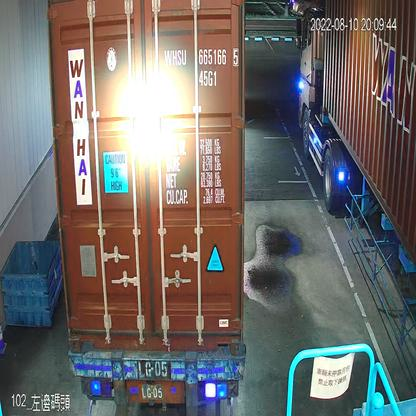

In [ ]:
#單張圖像預測
from ultralytics import YOLO

# 載入最佳模型
best_model_path = "/content/best_v5model.pt"
#best_model_path = "/content/runs/detect/train/weights/last.pt"
best_model = YOLO('yolov5n.yaml').load(best_model_path)
#best_model = YOLO('yolov5n.yaml').load('yolov5n.pt')
#best_model = YOLO('yolov5n.yaml')

# Define path to the image file
source = '/content/ML03_dataset/貨櫃資料集/images/test/image_0001.jpg'


# Run inference on the source
results = best_model(source)  # list of Results objects

#results = model('/content/ML03_dataset/貨櫃資料集/images/test/image_0007.jpg')

# 顯示物件類別
print(results[0].boxes.cls)
#print()

# 顯示物件座標
print(results[0].boxes.xyxy)

# 从列表中取出单个结果对象
pre_result = results[0]

# 可视化结果（显示预测框）
pre_result.plot()




image 1/1 /content/ML03_dataset/貨櫃資料集/images/test/image_0001.jpg: 640x640 1 train, 12.5ms
Speed: 3.1ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Predicted boxes coordinates:
tensor([[295.4100,   1.2136, 415.4965, 265.5183]], device='cuda:0')
Predicted class IDs:
tensor([6.], device='cuda:0')


array([[[104, 108, 103],
        [105, 109, 104],
        [105, 109, 104],
        ...,
        [ 23, 204, 146],
        [ 23, 204, 146],
        [ 23, 204, 146]],

       [[104, 108, 103],
        [105, 109, 104],
        [106, 110, 105],
        ...,
        [ 23, 204, 146],
        [ 23, 204, 146],
        [ 23, 204, 146]],

       [[105, 109, 104],
        [105, 109, 104],
        [106, 110, 105],
        ...,
        [ 23, 204, 146],
        [ 23, 204, 146],
        [ 23, 204, 146]],

       ...,

       [[  7, 233, 238],
        [ 52, 223, 231],
        [ 14,  73,  92],
        ...,
        [ 74, 169, 195],
        [ 73, 170, 198],
        [ 71, 168, 196]],

       [[  0, 234, 240],
        [ 52, 231, 240],
        [ 35,  97, 115],
        ...,
        [ 70, 167, 200],
        [ 70, 168, 202],
        [ 67, 167, 201]],

       [[  0, 237, 242],
        [ 54, 235, 244],
        [ 48, 111, 131],
        ...,
        [ 67, 167, 201],
        [ 68, 168, 203],
        [ 65, 167, 202]]], dtype=uint8)
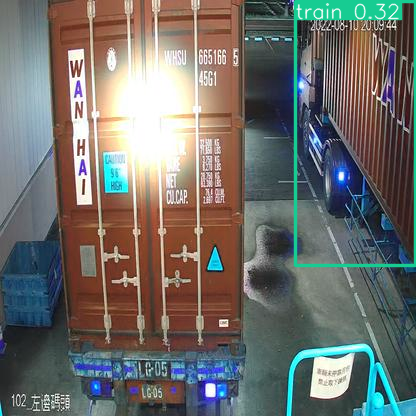

In [ ]:
from ultralytics import YOLO

# Step 1: 加载最佳模型
best_model_path = "/content/best_v5model.pt"
best_model = YOLO(best_model_path)  # 直接加载保存的最佳模型

# Step 2: 定义图像文件路径
source = '/content/ML03_dataset/貨櫃資料集/images/test/image_0001.jpg'

# Step 3: 在源图像上运行推断
results = best_model(source)

# Step 4: 显示预测的物体坐标
print("Predicted boxes coordinates:")
print(results[0].boxes.xyxy)

# Step 5: 显示预测的类别编号
print("Predicted class IDs:")
print(results[0].boxes.cls)

# Step 6: 提取单个结果对象
pre_result = results[0]

# Step 7: 可视化结果（显示预测框）
pre_result.plot()

# Step 8: 保存预测结果图像
#pre_result.save(f'/content/ML03_dataset/貨櫃資料集/images/test/image_0001_pred.jpg')



In [ ]:
print(1)

1


In [ ]:
# 績效評估
from ultralytics import YOLO
from ultralytics.utils.metrics import Metric
import os

# Initialize a Metric object
metric = Metric()

# 載入最佳模型
best_model_path = "/content/best_v5model.pt"
best_model = YOLO('yolov5n.yaml').load(best_model_path)

# 定義測試集的圖像路徑
test_image_path = '/content/ML03_dataset/貨櫃資料集/images/test'

# 定義測試集的標籤路徑
test_label_path = '/content/ML03_dataset/貨櫃資料集/labels/test'

# 加載所有標籤文件的內容
ground_truth_annotations = []

for label_file in os.listdir(test_label_path):
    if label_file.endswith('.txt'):
        with open(os.path.join(test_label_path, label_file), 'r') as f:
            lines = f.readlines()
            annotations = []
            for line in lines:
                # 解析每一行標籤，並將其加入到 annotations 列表中
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                x_min = max(0, (x_center - width / 2))
                y_min = max(0, (y_center - height / 2))
                x_max = min(1, (x_center + width / 2))
                y_max = min(1, (y_center + height / 2))
                annotations.append({
                    'class_id': int(class_id),
                    'bbox': [x_min, y_min, x_max, y_max]
                })
            ground_truth_annotations.append(annotations)

# 進行模型在測試集上的預測
model_predictions = {}

for img_file in os.listdir(test_image_path):
    img_path = os.path.join(test_image_path, img_file)
    results = best_model(img_path)
    predictions = []
    for result in results:
        for box in result.boxes.xyxy:
            class_id = int(box[0])
            confidence = float(box[4])
            x_min, y_min, x_max, y_max = box[1:5]
            predictions.append({
                'class_id': class_id,
                'confidence': confidence,
                'bbox': [x_min, y_min, x_max, y_max]
            })
    model_predictions[img_path] = predictions

# 更新評估指標
metric.update(ground_truth_annotations, model_predictions)

# 計算評估指標
map50 = metric.map50()  # Mean Average Precision at IoU threshold of 0.5
map75 = metric.map75()  # Mean Average Precision at IoU threshold of 0.75
map_ = metric.map()     # Mean Average Precision at IoU thresholds from 0.5 to 0.95

# 輸出評估結果
print("mAP@0.5:", map50)
print("mAP@0.75:", map75)
print("mAP@0.5:0.95:", map_)


Transferred 427/427 items from pretrained weights

image 1/1 /content/ML03_dataset/貨櫃資料集/images/test/image_0540.jpg: 640x640 3 2s, 2 6s, 15.3ms
Speed: 2.4ms preprocess, 15.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


IndexError: index 4 is out of bounds for dimension 0 with size 4

In [ ]:
import os
from PIL import Image
from ultralytics import YOLO

# Define paths
test_images_folder = '/content/ML03_dataset/貨櫃資料集/images/test'
output_folder = '/content/pre_test_image'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Load the best model
best_model_path = "/content/best_v5model.pt"
best_model = YOLO('yolov5n.yaml').load(best_model_path)

# Iterate through test images folder
for filename in os.listdir(test_images_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Define source path
        source_path = os.path.join(test_images_folder, filename)

        # Run inference on the source image
        results = best_model(source_path)

        # Iterate through each result object in the list
        for i, result in enumerate(results):
            # Plot the result (with predicted boxes) and save it
            img = result.render()
            img.save(os.path.join(output_folder, f'{filename[:-4]}_{i}.jpg'))


Transferred 427/427 items from pretrained weights

image 1/1 /content/ML03_dataset/貨櫃資料集/images/test/image_0540.jpg: 640x640 3 2s, 2 6s, 10.5ms
Speed: 2.4ms preprocess, 10.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'Results' object has no attribute 'render'. See valid attributes below.

    A class for storing and manipulating inference results.

    Attributes:
        orig_img (numpy.ndarray): Original image as a numpy array.
        orig_shape (tuple): Original image shape in (height, width) format.
        boxes (Boxes, optional): Object containing detection bounding boxes.
        masks (Masks, optional): Object containing detection masks.
        probs (Probs, optional): Object containing class probabilities for classification tasks.
        keypoints (Keypoints, optional): Object containing detected keypoints for each object.
        speed (dict): Dictionary of preprocess, inference, and postprocess speeds (ms/image).
        names (dict): Dictionary of class names.
        path (str): Path to the image file.

    Methods:
        update(boxes=None, masks=None, probs=None, obb=None): Updates object attributes with new detection results.
        cpu(): Returns a copy of the Results object with all tensors on CPU memory.
        numpy(): Returns a copy of the Results object with all tensors as numpy arrays.
        cuda(): Returns a copy of the Results object with all tensors on GPU memory.
        to(*args, **kwargs): Returns a copy of the Results object with tensors on a specified device and dtype.
        new(): Returns a new Results object with the same image, path, and names.
        plot(...): Plots detection results on an input image, returning an annotated image.
        show(): Show annotated results to screen.
        save(filename): Save annotated results to file.
        verbose(): Returns a log string for each task, detailing detections and classifications.
        save_txt(txt_file, save_conf=False): Saves detection results to a text file.
        save_crop(save_dir, file_name=Path("im.jpg")): Saves cropped detection images.
        tojson(normalize=False): Converts detection results to JSON format.
    

In [ ]:
'''
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv5n model
model = YOLO('yolov5n.pt')

# Display model information (optional)
model.info()

# 使用模型
model.train(data="coco8.yaml", epochs=3)  # 訓練模型
metrics = model.val()  # 在驗證集上評估模型性能
results = model("https://ultralytics.com/images/bus.jpg")  # 對圖片進行預測
'''

PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|█████████████████████████████████████████████████████████████████████████████| 5.27M/5.27M [00:01<00:00, 4.05MB/s]


YOLOv5n summary: 262 layers, 2654816 parameters, 0 gradients, 7.8 GFLOPs
Ultralytics YOLOv8.2.14  Python-3.8.19 torch-2.3.0+cpu CPU (12th Gen Intel Core(TM) i7-12700H)
engine\trainer: task=detect, mode=train, model=yolov5n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

train: Scanning C:\Users\linda\machinelearning\ML03\datasets\coco8\labels\train.cache... 4 images, 0 backgrounds, 0 cor
val: Scanning C:\Users\linda\machinelearning\ML03\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G       1.41      2.876      1.754         22        640: 100%|██████████| 1/1 [00:01<00:00,  1.34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all          4         17      0.786      0.667      0.903      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G       1.32      2.709      1.542         23        640: 100%|██████████| 1/1 [00:00<00:00,  1.15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17      0.782      0.667      0.904      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.122      3.328      1.466         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         17      0.784      0.667      0.904      0.604



3 epochs completed in 0.003 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 5.6MB
Optimizer stripped from runs\detect\train\weights\best.pt, 5.6MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.14  Python-3.8.19 torch-2.3.0+cpu CPU (12th Gen Intel Core(TM) i7-12700H)
YOLOv5n summary (fused): 193 layers, 2649200 parameters, 0 gradients, 7.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          4         17      0.782      0.667      0.904      0.613
                person          4         10      0.787        0.5      0.614      0.304
                   dog          4          1          1          0      0.995      0.597
                 horse          4          2      0.747          1      0.995      0.747
              elephant          4          2      0.902        0.5      0.828      0.336
              umbrella          4          1       0.54          1      0.995      0.796
          potted plant          4          1      0.713          1      0.995      0.895
Speed: 1.1ms preprocess, 49.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train
Ultralytics YOLOv8.2.14  Python-3.8.19 torch-2.3.0+cpu CPU (12th Gen Intel Core(TM) i7-12700H)
YOLOv5n summary (fused): 193 layers, 2649200 parameters, 0 gradients, 7.7 GFLOPs


val: Scanning C:\Users\linda\machinelearning\ML03\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          4         17      0.782      0.667      0.904      0.613
                person          4         10      0.787        0.5      0.614      0.304
                   dog          4          1          1          0      0.995      0.597
                 horse          4          2      0.747          1      0.995      0.747
              elephant          4          2      0.902        0.5      0.828      0.336
              umbrella          4          1       0.54          1      0.995      0.796
          potted plant          4          1      0.713          1      0.995      0.895
Speed: 1.3ms preprocess, 46.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train2



100%|███████████████████████████████████████████████████████████████████████████████| 476k/476k [00:00<00:00, 1.40MB/s]

image 1/1 C:\Users\linda\machinelearning\ML03\bus.jpg: 640x480 4 persons, 1 bus, 73.1ms


Speed: 3.6ms preprocess, 73.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
